# K Nearest Neighbours (KNN)
The KNN algorithm works by storing all known classified values and makes predictions for new cases based on similarity measure.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zoo-animal-classification/zoo.csv
/kaggle/input/zoo-animal-classification/class.csv


## Importing Libraries for ML model

Importing subpackages from scikit-learn library

In [2]:
# Import additional required libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import *
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

## Importing and Modifying the Data

Reading the data using `pandas.read_csv()`.

In [3]:
# Importing dataset
zoo_df = pd.read_csv('../input/zoo-animal-classification/zoo.csv')
class_df = pd.read_csv('../input/zoo-animal-classification/class.csv')
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
class_df.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


Since we want to use the information in both of these datasets, we can merge them along a common column, the `class_type` and `Class_Number` columns.

In [5]:
# Joining datasets along the class number column present in both datasets
animal_df = zoo_df.merge(class_df,how='left',left_on='class_type',right_on='Class_Number')
animal_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


Here we can remove the column `class_type` which was originally from `zoo_df` as it is now a duplicate of `Class_Number`, and also because it shares a name with `Class_Type` originally from `class_df`.

We can also remove the columns `Animal_Names` and `Number_Of_Animal_Species_In_Class` as they does not provide us with any classification insights.

In [6]:
# Dropping unwanted columns
## I am renaming the dataframe as zoo_df because it is shorter to use
zoo_df = animal_df.drop(['class_type','Animal_Names', 'Number_Of_Animal_Species_In_Class'], axis=1)
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Number,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [7]:
zoo_df.isnull().any()

animal_name     False
hair            False
feathers        False
eggs            False
milk            False
airborne        False
aquatic         False
predator        False
toothed         False
backbone        False
breathes        False
venomous        False
fins            False
legs            False
tail            False
domestic        False
catsize         False
Class_Number    False
Class_Type      False
dtype: bool

We have no missing data so all the entries are valid for use.

Now we can check the column names to get a better understanding of what features we will be basing our classification on.

## Initial Evaluation

Review data prior to implementing model using basic stats and visualizations.

In [8]:
# Get names of columns in zoo_df
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   animal_name   101 non-null    object
 1   hair          101 non-null    int64 
 2   feathers      101 non-null    int64 
 3   eggs          101 non-null    int64 
 4   milk          101 non-null    int64 
 5   airborne      101 non-null    int64 
 6   aquatic       101 non-null    int64 
 7   predator      101 non-null    int64 
 8   toothed       101 non-null    int64 
 9   backbone      101 non-null    int64 
 10  breathes      101 non-null    int64 
 11  venomous      101 non-null    int64 
 12  fins          101 non-null    int64 
 13  legs          101 non-null    int64 
 14  tail          101 non-null    int64 
 15  domestic      101 non-null    int64 
 16  catsize       101 non-null    int64 
 17  Class_Number  101 non-null    int64 
 18  Class_Type    101 non-null    object
dtypes: int64

In [9]:
zoo_df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Number
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


From this we can see that all of the animal characteristics or feature values are given as binary values (1- present / 0-absent) except for the legs where it is given as a count of legs.

We need to keep this in mind going forward while using the data.

Next let's get the distribution of animal data across the types of classes.

In [10]:
# Set default plot grid
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Histogram of Classes')

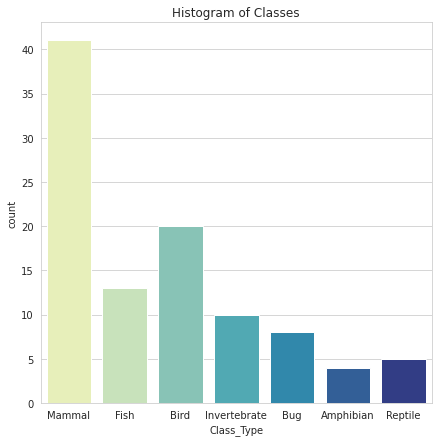

In [11]:
# Plot histogram of classes
plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(zoo_df['Class_Type'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Classes")

We can also see if there are any trends or correlations in the data using a heatmap.

As mentioned previously, we will want to treat the `legs` columns differently as it does not present data the same way as the remaining columns. So, we will create a column `has_legs` that checks if an animal has legs (1) or not (0).

In [12]:
zoo_df['has_legs'] = np.where(zoo_df['legs']>0,1,0)
zoo_df = zoo_df[['animal_name','hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes','venomous','fins','legs','has_legs','tail','domestic','catsize','Class_Number','Class_Type']]
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,Class_Number,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1,Mammal


Text(0.5, 1.0, 'Features for the Animals')

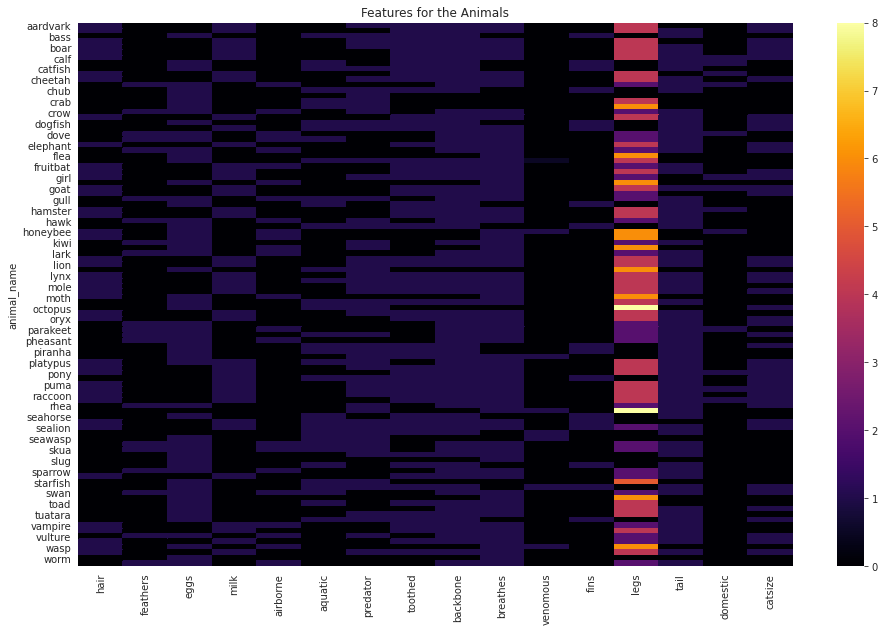

In [13]:
zoo_df_temp = zoo_df.drop(['has_legs','Class_Number'], axis=1)
zoo_df_temp = zoo_df_temp.groupby(by='animal_name').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(zoo_df_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Features for the Animals")

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

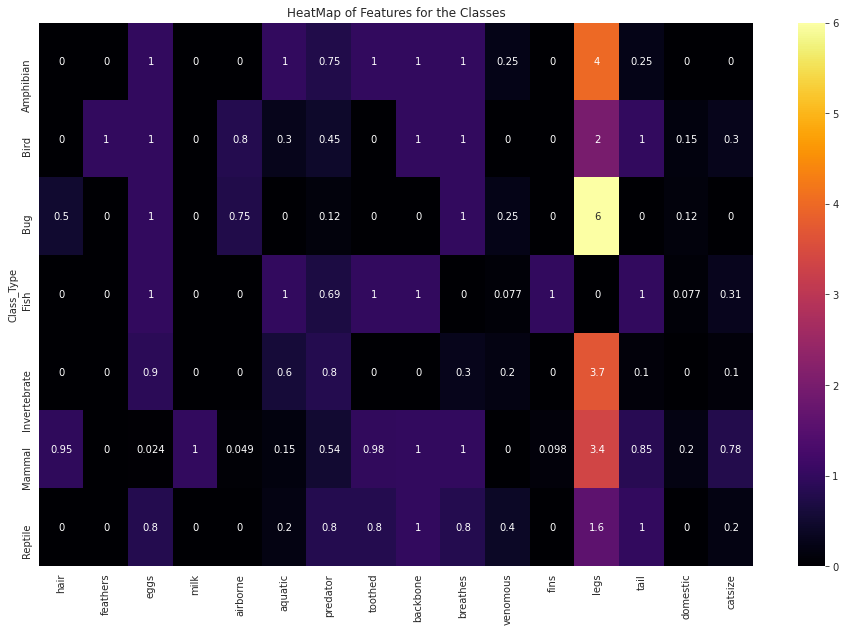

In [14]:
zoo_df_temp = zoo_df.drop(['has_legs','Class_Number'], axis=1)
zoo_df_temp = zoo_df_temp.groupby(by='Class_Type').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(zoo_df_temp, annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

Here we can see how `legs` having a larger range of values [0-8] than the rest of the features skews the data.

Now, let's try that again but using `has_legs` instead.

Text(0.5, 1.0, 'Features for the Animals')

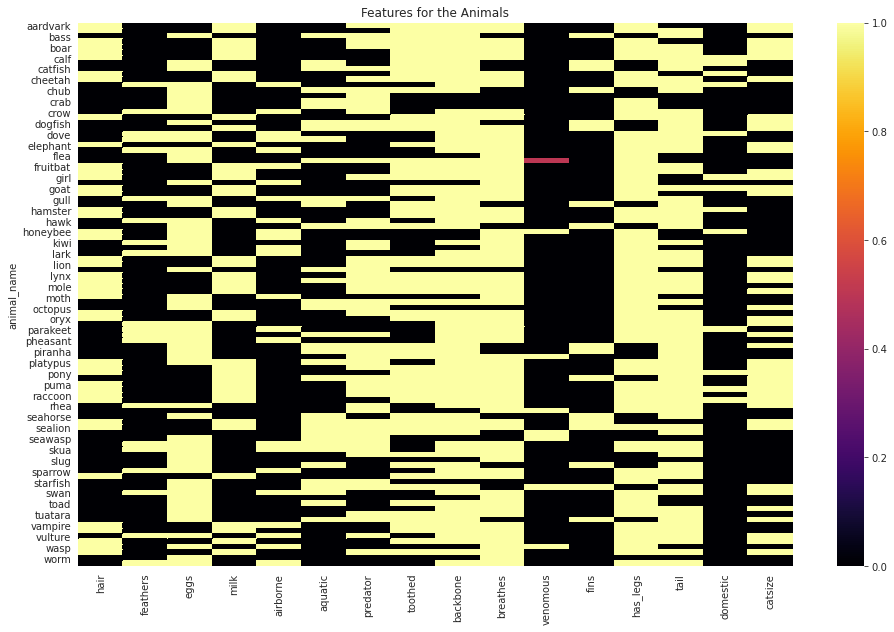

In [15]:
zoo_df_temp = zoo_df.drop(['legs','Class_Number'], axis=1)
zoo_df_temp = zoo_df_temp.groupby(by='animal_name').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(zoo_df_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Features for the Animals")

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

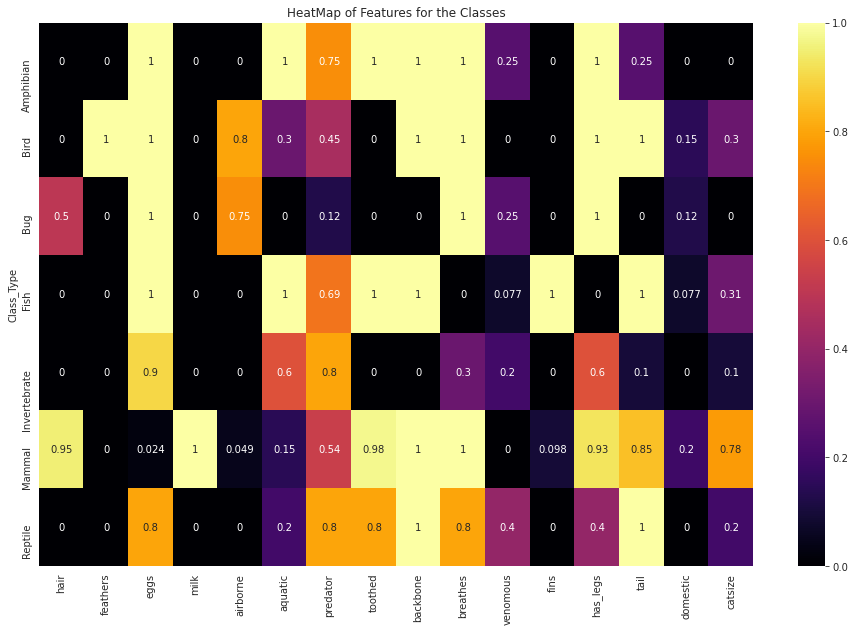

In [16]:
zoo_df_temp = zoo_df.drop(['legs','Class_Number'], axis=1)
zoo_df_temp = zoo_df_temp.groupby(by='Class_Type').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(zoo_df_temp, annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

This gives us a much clearer idea of what features play a more or less important role in identifying certain animals.

## Prepraring Data for Models
We will be removing column `animal_name` as it does not help us in classification. We will also remove `has_legs` since it is not part of the original data, and is not as insightful as it's parent feature `legs`.

After that, we can assign the remaining relevant columns to the X and y sets.

In [17]:
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,Class_Number,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1,Mammal


In [18]:
# Select columns to add to X and y sets
features = list(zoo_df.columns.values)
features.remove('has_legs')
features.remove('Class_Type')
features.remove('Class_Number')
features.remove('animal_name')
X = zoo_df[features]
y = zoo_df['Class_Number']

Split X, y data into training set and testing set.

In [19]:
# Split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

## Train model
Create and train knn classifier to use on zoo data

In [20]:
# Fit k-nearest neighbors classifier with training sets for n = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Test and Evaluate model

Run predicitions on the test data

In [21]:
# Run prediction
y_pred = knn.predict(X_test)

Get the confusion matrix and classification report for model.

In [22]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.83      0.86      0.84        26
weighted avg       0.93      0.96      0.94        26



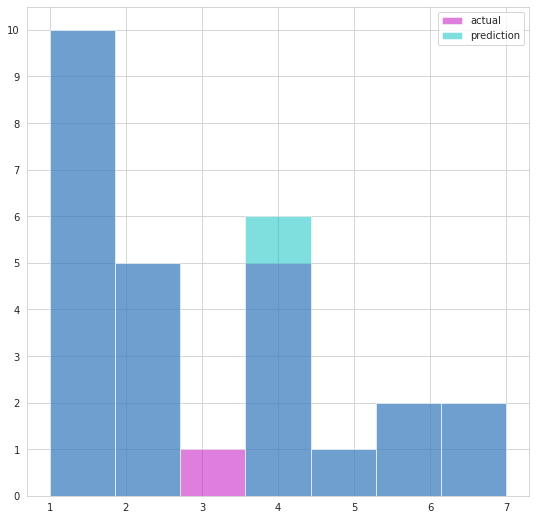

In [24]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

What this figure tells us is the total number of animals in each class according to the test data and predicted data. <br>
We can see that the predictions matches almost all the actual animal classifications (indicated by color overlap) except for one case where the model failed to identify an animal as belonging to class 3 (Reptile), and marked it as being in class 4 (Fish).

So we can see the level of accuracy for this particular classifier.

Now that we know what the model can do at n=5, we should run the model for multiple values of n to find optimal value of n with respect to this dataset.

In [25]:
# Get score for different values of n
k_list = np.arange(1, 50, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    score = cross_val_score(knn,X_train, y_train,cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

print("Mean Scores:")
print(mean_scores)
print("Error Rate:")
print(error_rate)

Mean Scores:
[0.9178571428571429, 0.9178571428571429, 0.8232142857142858, 0.7714285714285714, 0.7589285714285714, 0.7589285714285714, 0.7464285714285713, 0.7464285714285713, 0.7589285714285714, 0.6946428571428571, 0.6535714285714286, 0.5607142857142857, 0.5607142857142857, 0.5732142857142857, 0.5732142857142857, 0.5732142857142857, 0.5607142857142857, 0.5214285714285714, 0.5107142857142857, 0.5232142857142856, 0.48392857142857143, 0.4428571428571429, 0.41428571428571426, 0.41428571428571426, 0.41428571428571426]
Error Rate:
[0.0, 0.0, 0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.19230769230769232, 0.19230769230769232, 0.19230769230769232, 0.19230769230769232, 0.15384615384615385, 0.15384615384615385, 0.23076923076923078, 0.46153846153846156, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.46153846153846156, 0.46153846153846156, 0.5, 0.5, 0.6153846153846154]


## Visualization of Model Performance of Different n-Values
Create a plot of the average accuracy of the prediction model for different values of k between 1 to 50.

This is to help us better see which value of k works best with this model.

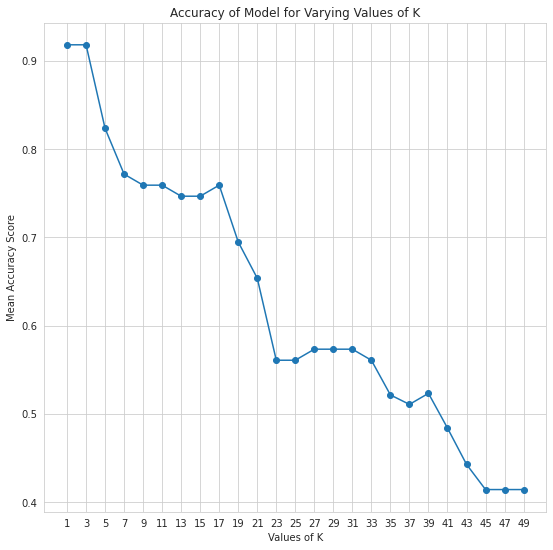

In [26]:
# Plot n values and average accuracy scores
plt.plot(k_list,mean_scores, marker='o')

# Added titles and adjust dimensions
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

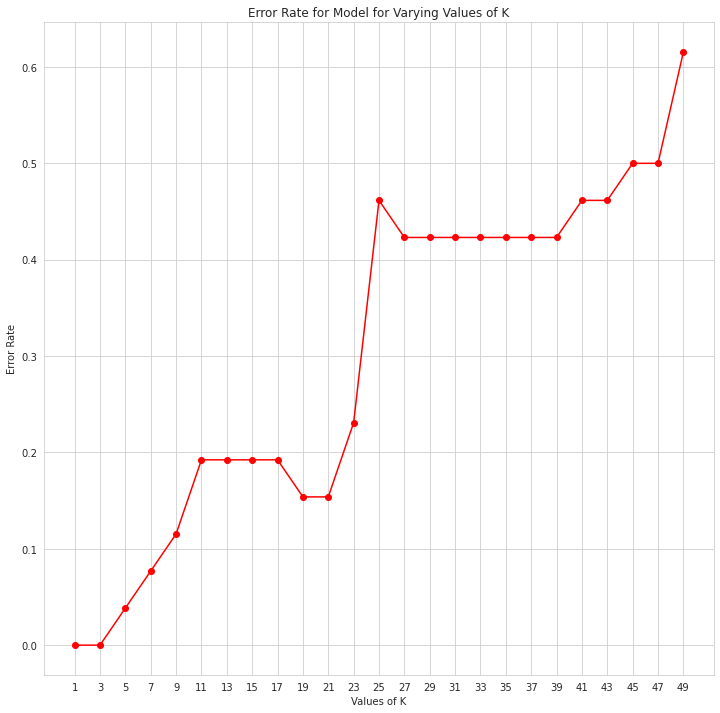

In [27]:
# Plot n values and average accuracy scores
plt.plot(k_list,error_rate, color='r', marker = 'o')

# Added titles and adjust dimensions
plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

## Out of Curiosity...

So, we've seen how this works when we use all the features values as given. <br>
Just for fun, let's see how this changes if we don't use the values for `legs` and use `has_legs` instead as we did when plotting our heatmap.

I'll run the exact same code as before changing nothing but using `has_legs` and not `legs`. <br>

In [28]:
# Select columns to add to X and y sets
features = list(zoo_df.columns.values)
features.remove('legs')
features.remove('Class_Type')
features.remove('Class_Number')
features.remove('animal_name')
X2 = zoo_df[features]
y2 = zoo_df['Class_Type']

In [29]:
# Split X and y into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state = 0)

In [30]:
# Fit k-nearest neighbors classifier with training sets for n = 5
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X2_train, y2_train)

KNeighborsClassifier()

In [31]:
# Run prediction
y2_pred = knn2.predict(X2_test)

In [32]:
print(confusion_matrix(y2_test,y2_pred))

[[ 1  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  1]]


In [33]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

   Amphibian       1.00      1.00      1.00         1
        Bird       1.00      1.00      1.00         5
         Bug       1.00      1.00      1.00         2
        Fish       1.00      1.00      1.00         5
Invertebrate       1.00      1.00      1.00         2
      Mammal       1.00      1.00      1.00        10
     Reptile       1.00      1.00      1.00         1

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



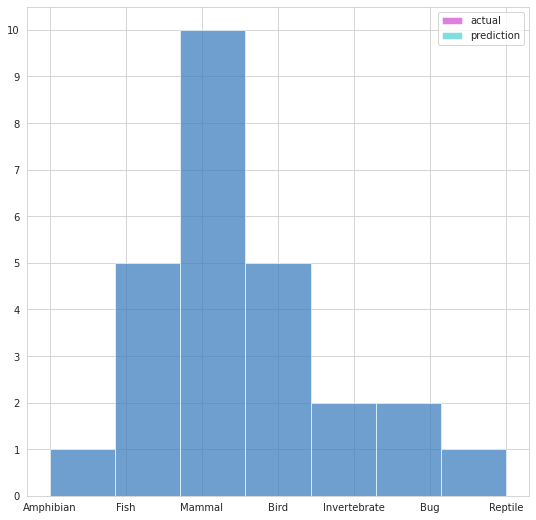

In [34]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y2_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y2_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')

plt.show()

In [35]:
# Get score for different values of n
k_list = np.arange(1, 50, 2)
mean_scores2 = []
accuracy_list2 = []
error_rate2 = []

for i in k_list:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X2_train,y2_train)
    pred_i = knn2.predict(X2_test)
    score = cross_val_score(knn2,X2_train, y2_train,cv=10)
    mean_scores2.append(np.mean(score))
    error_rate2.append(np.mean(pred_i != y2_test))

print("Mean Scores:")
print(mean_scores)
print("Error Rate:")
print(error_rate)

Mean Scores:
[0.9178571428571429, 0.9178571428571429, 0.8232142857142858, 0.7714285714285714, 0.7589285714285714, 0.7589285714285714, 0.7464285714285713, 0.7464285714285713, 0.7589285714285714, 0.6946428571428571, 0.6535714285714286, 0.5607142857142857, 0.5607142857142857, 0.5732142857142857, 0.5732142857142857, 0.5732142857142857, 0.5607142857142857, 0.5214285714285714, 0.5107142857142857, 0.5232142857142856, 0.48392857142857143, 0.4428571428571429, 0.41428571428571426, 0.41428571428571426, 0.41428571428571426]
Error Rate:
[0.0, 0.0, 0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.19230769230769232, 0.19230769230769232, 0.19230769230769232, 0.19230769230769232, 0.15384615384615385, 0.15384615384615385, 0.23076923076923078, 0.46153846153846156, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.46153846153846156, 0.46153846153846156, 0.5, 0.5, 0.6153846153846154]


Here I'll plot the original and new curves together so we can see and compare any differences.

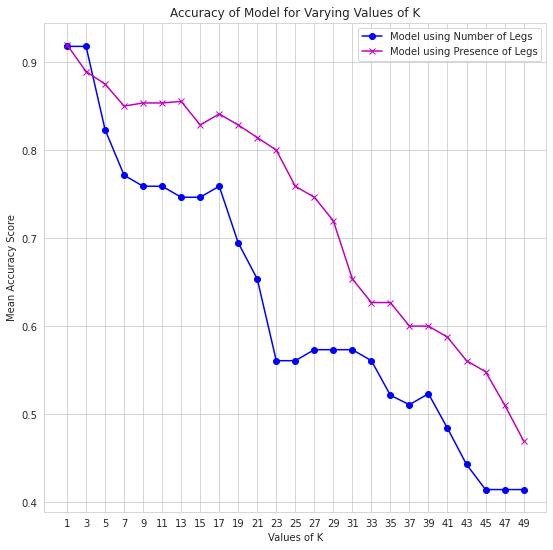

In [36]:
# Plot n values and average accuracy scores
plt.plot(k_list,mean_scores, color='b',marker='o', label='Model using Number of Legs')
plt.plot(k_list,mean_scores2, color='m',marker='x', label='Model using Presence of Legs')

# Added titles and adjust dimensions
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

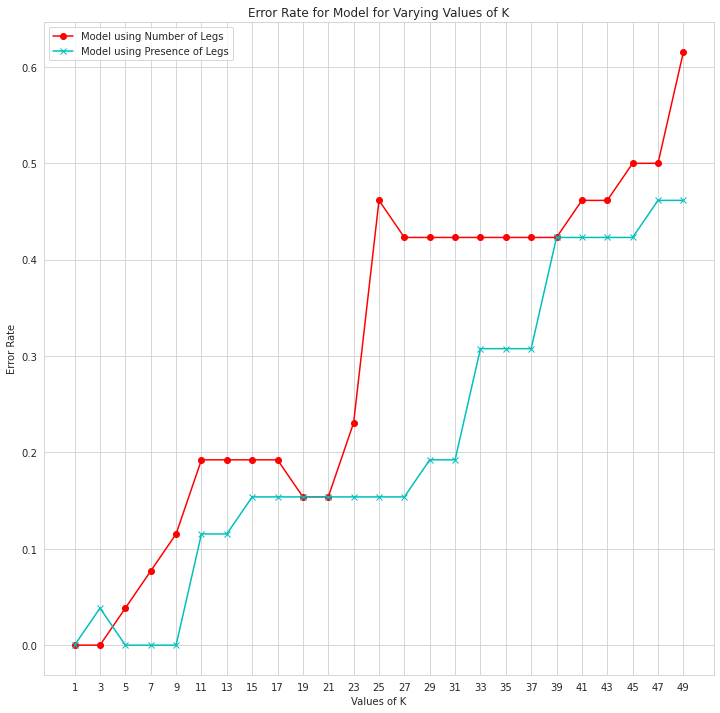

In [37]:
# Plot n values and average accuracy scores
plt.plot(k_list,error_rate, color='r', marker = 'o', label='Model using Number of Legs')
plt.plot(k_list,error_rate2, color='c', marker = 'x', label='Model using Presence of Legs')

# Added titles and adjust dimensions
plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

### Inference

So interestingly, <br>
Replacing the feature `legs` with `has_legs` improved the accuracy of KNN models at every value where n >3 <br>
This may be due to the model taking the number of legs as a continuous, numeric data point rather than as an enumerate. <br>